<a href="https://colab.research.google.com/github/SrishBansal/colaab/blob/colab/2021_01_14_Srish_Bansal_CapstoneProject11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 11: Video Game Sales Analysis - Grouping & Aggregation

### Context

Video games creation is essentially a software development process.  A group of individuals or a company create a video game with the aim of massive profits. Generally, publishers such as EA Sports, Atari, Rockstar Games etc. fund the game development process. However, for publishers, it is very important to estimate the cost of development of a video game. Additionally, they also have to allocate the right amount of budget. If the budget is too little, the quality of a game will get compromised whereas if the budget is too much, their profit margin will reduce. Most of the commercial games do not generate adequate profit.

A video game is an interactive visual story. A new game must provide novelty and must be a product of innovation. Otherwise, it may turn out repetitive and boring. Many individual groups of game developers shut down their development process and exit the market because they cannot find a publisher or they can't fund the development by themselves as the initial capital investment requirement is humongous. Nevertheless, once the companies become financially stable by making sufficient profits, they may expand to develop newer games or sequels to the initial ones such as FIFA, Call of Duty, Age of Empires etc.

An average development budget for a multiplatform (PC, PS, Xbox etc.) game is US \$18 to 28 million, with high-profile games often exceeding US $40 million.



---

### Problem Statement

Imagine that you work for one of the world's biggest tech giants as a data analyst. The company intends to venture into the video game development business by either creating their own video games and gaming platforms or by funding a group of individual game developers.

As a part of market research, your CEO wants to come up with a business strategy to enable your company to enter into the video game development business. However, in the best interest of companies financial investment in this project, it is important to know whether there are enough buyers, in the long run, do the number of buyers increase so that they stay invested in this project.

Your CEO would like to know what kind of games are most popular in terms of the most units sold, what are the most commonly used gaming platforms such as PS4, Xbox, PC etc.

---

### Dataset Description

You are provided with a video games sales dataset. It consists of the following features:

1. `Rank` - Rank based on the number of units sold of a game. The most sold game is ranked 1.

2. `Name` - The name of a video game.

3. `Platform` - The platform (PC, PS4, XBox etc.) for which a game is released.

4. `Year` - The release year of a video game.

5. `Genre` - The genre of a video game.

6. `Publisher` - The publisher of a video game.

7. `NA_Sales` - Approximately, the total number of units sold (in million) of a video game in North America.

8. `EU_Sales` - Approximately, the total number of units sold (in million) of a video game in Europe.

9. `JP_Sales` - Approximately, the total number of units sold (in million) of a video game in Japan.

10. `Other_Sales` - Approximately, the total number of units sold (in million) of a video game in the rest of the world.

11. `Global_Sales` - Approximately, the total number of units sold (in million) of a video game all over the world.

Here's a link to the dataset:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/video-games-sales/video-game-sales.csv

---

### Things To Do

- The `Year` and `Publisher` columns contain few missing values. Treat them accordingly.

- Convert the values contained in the `Year` column into integer values.

- Find out:

  1. The trend of growth in the number of total units sold across the given regions and the world. Also create year-wise line plots for the total number of units sold across different regions and the world.
  
  2. Top 10 most sold genres of video games but at least 100 million units sold globally. Also create genre-wise line plots for the total number of units sold across different regions and the world.

  3. Top 10 best publishers of video games but at least 100 million units sold globally.
  
  4. Top 10 most commonly used gaming platform but at least 100 million units sold globally.

---

#### 1. Import Modules & Load Data

In [ ]:
# Import the modules required.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset.
Video_Games = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/video-games-sales/video-game-sales.csv")

In [ ]:
# Get the dataset information.
Video_Games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


---

#### 2. Treat Null Values

In [ ]:
# Check for the null values in all the columns.
Video_Games.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Remove the rows/columns containing the null values.
Video_Games.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Convert the data-type of the year values into integer values.
Video_Games['Year'] = dict(Video_Games['Year'])
Video_Games['Year'].astype(int)

0            0
1            1
2            2
3            3
4            4
         ...  
16593    16593
16594    16594
16595    16595
16596    16596
16597    16597
Name: Year, Length: 16598, dtype: int64

---

#### 3. Yearly Total Units Sold

In [ ]:
# Find out the total number of units sold yearly across different regions and the world.
Video_Games['Global_Sales']

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64

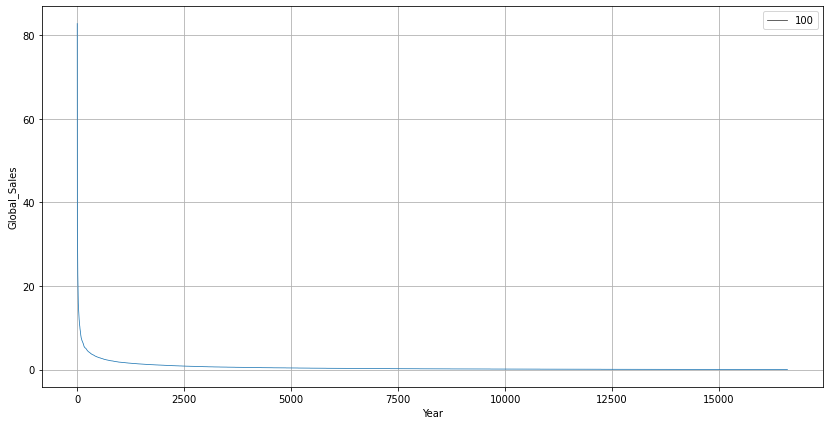

In [ ]:
# Create the line plots for the total number of units sold yearly across different regions and the world.
plt.figure(figsize= (14,7))
sns.lineplot(x ='Year',y= 'Global_Sales', size = 100 ,data = Video_Games)
plt.grid()
plt.show()

**Q:** In which year, the most number of games were sold globally and how many?

**A:** The most number of games were 82.74 and were sold globally in year 2006.

In [ ]:
# In which year, the most number of games were sold globally and how many?


---

#### 4. Genre-wise Total Units Sold

In [ ]:
# Find out the genre-wise total number of units sold across different regions and the world.
print(f"JP_Sales \n\n {Video_Games['JP_Sales'].value_counts()} \n \n")
print(f"EU_Sales \n\n {Video_Games['EU_Sales'].value_counts()} \n \n")
print(f"NA_Sales \n\n {Video_Games['NA_Sales'].value_counts()} \n \n")
print(f"Other_Sales \n\n {Video_Games['Other_Sales'].value_counts()} \n \n")

JP_Sales 

 0.00    10455
0.02      728
0.01      704
0.03      528
0.04      397
        ...  
1.97        1
1.51        1
1.16        1
2.12        1
6.50        1
Name: JP_Sales, Length: 244, dtype: int64 
 

EU_Sales 

 0.00     5730
0.01     1496
0.02     1269
0.03      934
0.04      748
         ... 
2.39        1
1.23        1
8.03        1
6.21        1
11.00       1
Name: EU_Sales, Length: 305, dtype: int64 
 

NA_Sales 

 0.00     4499
0.02      550
0.01      541
0.03      533
0.05      530
         ... 
5.99        1
14.03       1
4.21        1
9.03        1
9.00        1
Name: NA_Sales, Length: 409, dtype: int64 
 

Other_Sales 

 0.00    6477
0.01    3445
0.02    1582
0.03     939
0.04     666
        ... 
1.48       1
2.46       1
1.51       1
2.12       1
0.98       1
Name: Other_Sales, Length: 157, dtype: int64 
 



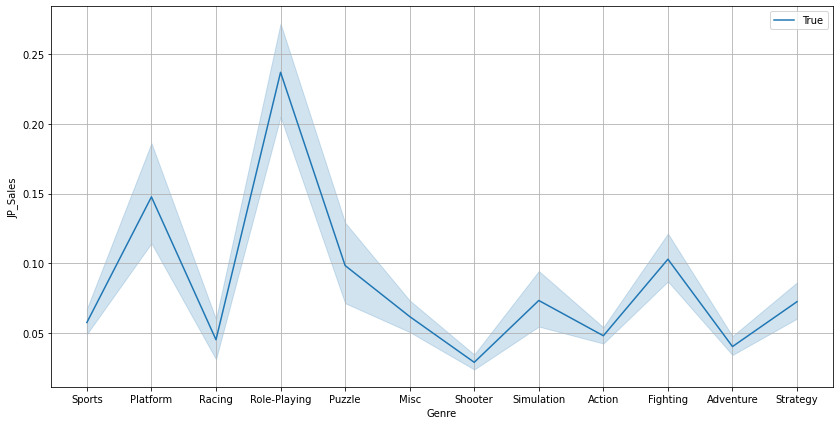

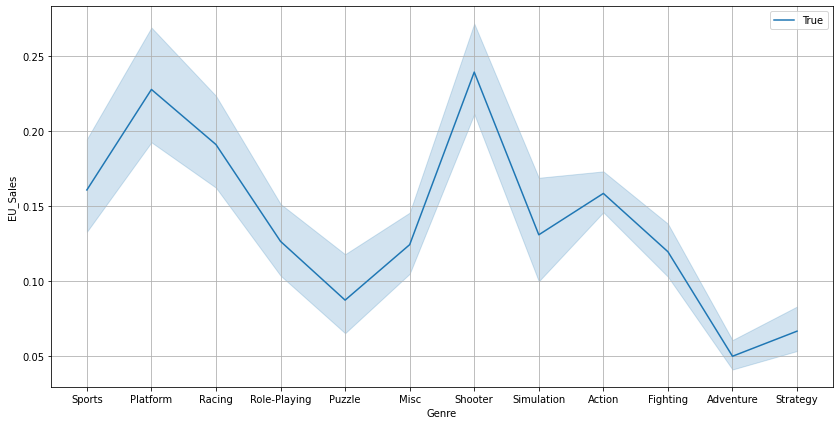

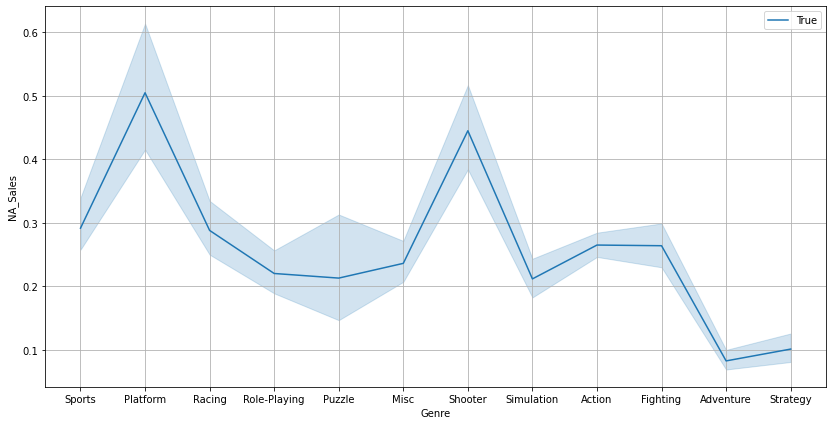

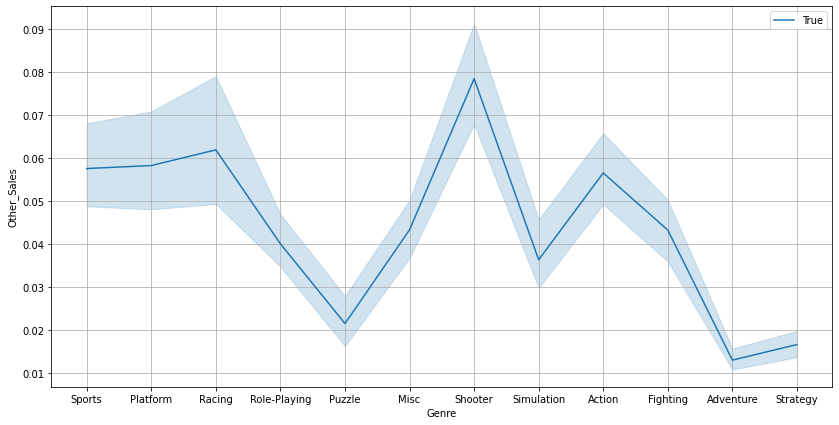

In [ ]:
# Create line plots for genre-wise total number of units sold across different regions and the world.
plt.figure(figsize= (14,7))
sns.lineplot(x ='Genre',y= 'JP_Sales', hue = True ,data = Video_Games)
plt.grid()
plt.show()
plt.figure(figsize= (14,7))
sns.lineplot(x ='Genre',y= 'EU_Sales', hue = True ,data = Video_Games)
plt.grid()
plt.show()
plt.figure(figsize= (14,7))
sns.lineplot(x ='Genre',y= 'NA_Sales', hue = True ,data = Video_Games)
plt.grid()
plt.show()
plt.figure(figsize= (14,7))
sns.lineplot(x ='Genre',y= 'Other_Sales', hue = True ,data = Video_Games)
plt.grid()
plt.show()

**Q:** What genre of video game is most popular in Japan in terms of the total number of units sold? Also, provide the total number of units sold in Japan for that genre.

**A:** Role-Playing is most popular in Japan in terms of total number of units  sold. Sales were 10.2.

In [ ]:
# What genre of video game is most popular in Japan in terms of the total number of units sold?


In [ ]:
# Genre-wise total number of units sold across different regions and the world in descending order.
Video_Games['Genre'].sort_values(ascending = False).value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

**Q:** Which genre of the video games sells the most globally and how much?

**A:** Action video games are sold the most globally (3316).

---

#### 5. Publisher-wise Total Units Sold

In [ ]:
# Find out the publisher-wise total number of units sold across different regions and the world in the descending order.
Video_Games['Publisher'].sort_values(ascending = False).value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
TYO                                1
Aques                              1
RED Entertainment                  1
Commseed                           1
Introversion Software              1
Name: Publisher, Length: 578, dtype: int64

**Q:** Which video game publisher sells the most number of units globally and how much?

**A:** The Electronic Arts video game publisher sell the  most number of units(1351) globally.

---

#### 6. Platform-wise Total Units Sold

In [ ]:
# Find out the platform-wise the total number of units sold across different regions and the world in the descending order.
Video_Games['Platform'].sort_values(ascending = False).value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

**Q:** For which platform of a video game, the most number of units are sold globally and how much?

**A:** For the platform DS of a video game, the monst number of units(2163) were sold globally.

---

---